# Matplotlib

## pyplot

[Matplotlib](https://matplotlib.org/) es una librería diseñada para crear representaciones gráficas de datos.
Podemos utilizar matplotlib utilizando un par de interfaces distintos, el más común es [pyplot](https://matplotlib.org/api/pyplot_api.html), un módulo similar a la parte de visualización gráfica de MATLAB.

pyplot es un entorno basado en una state-machine (máquina de estados). Cuando usamos pyplot la primera llamada crea automática e implícitamente una figura y un axes.
El estado de la figura se conserva através de las distintas llamadas a las funciones de dibujo por lo que las siguientes llamadas irán añadiendo elementos (líneas, columnas, puntos, etc).

Alternativamente a pyplot se puede usar un interfaz orientado objetos en el que el usuario debe encargarse de controlar los objetos que representan las figuras y los axes.

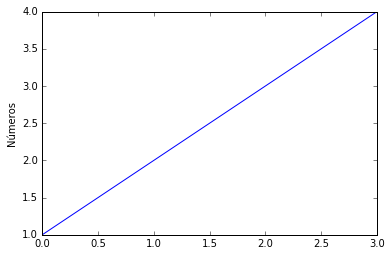

In [26]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('Números')

Matplotlib está diseñado para trabajar con arrays de Numpy y también puede funcionar con listas de Python.
Si queremos utilizar DataFrames de pandas puede que en algunos casos tengamos que recurrir a sus representaciones internas de Numpy.

## Anatomía de un gráfico

La clase [Figure](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure) representa a la figura completa.
Dentro de una figura pueden haber varias gráficas.

La clase [Axes](https://matplotlib.org/api/axes_api.html) representa una gráfica concreta dentro de la figura.

![figure y axes](../imagenes/matplotlib_figure_axes.png)

No hay que confundir Axes con Axis.
Un axis es un eje, habitualmente un axes tendrá dos o tres axis, además de otros muchos componentes.

![Anatomia de una figura matplotlib](../imagenes/matplotlib_anatomy.png)

A continuación veremos algunos ejemplos adaptados a partir de la documentación de matplotlib.

## Ejemplo: una línea

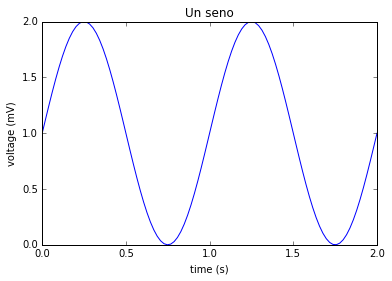

In [27]:
import matplotlib.pyplot as plt
import numpy

# Generamos algunos datos
valores_x = numpy.linspace(0.0, 2.0, 100)
valores_y = 1 + numpy.sin(2 * numpy.pi * valores_x)

plt.plot(valores_x, valores_y)
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.title('Un seno')

# Note that using plt.subplots below is equivalent to using
# fig = plt.figure() and then ax = fig.add_subplot(111)
#fig, ax = plt.subplots()
#ax.plot(valores_x, valores_y)

#ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#       title='About as simple as it gets, folks')

Alternativamente podríamos haber utilizado la interfaz orientada a objetos para conseguir el mismo resultado.
En este caso sólo utilizamos pyplot para conseguir una figura y un axes.

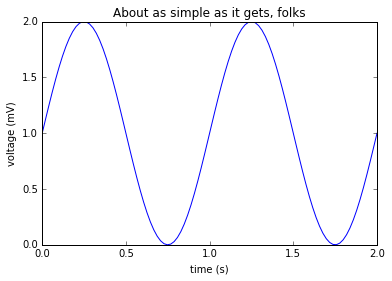

In [28]:
import matplotlib.pyplot as plt
import numpy

# Generamos algunos datos
valores_x = numpy.linspace(0.0, 2.0, 100)
valores_y = 1 + numpy.sin(2 * numpy.pi * valores_x)

# Note that using plt.subplots below is equivalent to using
# fig = plt.figure() and then ax = fig.add_subplot(111)
fig, ax = plt.subplots()
ax.plot(valores_x, valores_y)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')

## Ejemplo: Dos gráficas en la misma figura

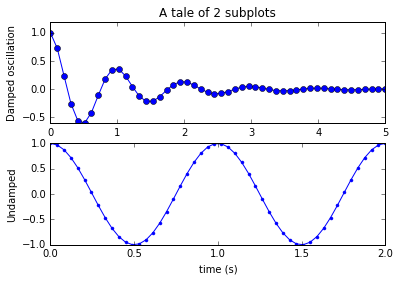

In [29]:
import numpy
import matplotlib.pyplot as plt

x1 = numpy.linspace(0.0, 5.0)
x2 = numpy.linspace(0.0, 2.0)

y1 = numpy.cos(2 * numpy.pi * x1) * numpy.exp(-x1)
y2 = numpy.cos(2 * numpy.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

## Ejemplo: histograma

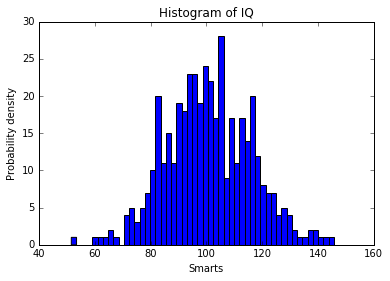

In [35]:
import numpy
import matplotlib.pyplot as plt

# datos de ejemplo
mu = 100  # media de la distribucion
sigma = 15  # desviacion estandar
valores = mu + sigma * numpy.random.randn(437)

num_bins = 50

# el histograma
n, bins, patches = plt.hist(valores, num_bins)

plt.xlabel('Smarts')
plt.ylabel('Probability density')
plt.title('Histogram of IQ')


## Ejemplo: barras

([<matplotlib.axis.XTick at 0x7f027ad737f0>,
 <a list of 5 Text xticklabel objects>)

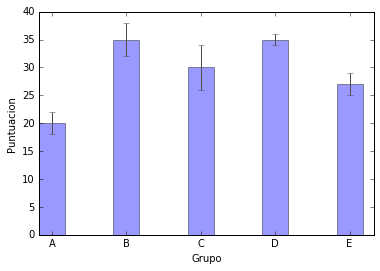

In [37]:
import numpy
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

n_groups = 5

valores = (20, 35, 30, 35, 27)
errores = (2, 3, 4, 1, 2)

valores_x = numpy.arange(len(valores))
ancho_barras = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

plt.bar(valores_x, valores, ancho_barras,
        alpha=opacity, color='b',
        yerr=errores, error_kw=error_config)

plt.xlabel('Grupo')
plt.ylabel('Puntuacion')
plt.xticks(valores_x + ancho_barras / 2,
           ('A', 'B', 'C', 'D', 'E'))


## Ejemplo: scatter

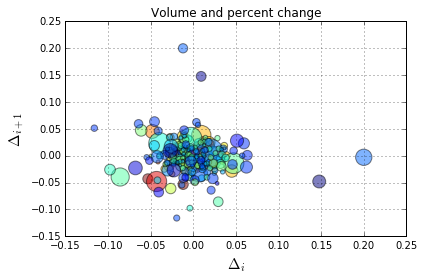

In [41]:
import numpy
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    price_data = numpy.load(datafile)['price_data'].view(numpy.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = numpy.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
plt.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

plt.xlabel(r'$\Delta_i$', fontsize=15)
plt.ylabel(r'$\Delta_{i+1}$', fontsize=15)
plt.title('Volume and percent change')

plt.grid(True)
plt.tight_layout()